In [2]:
from scipy.stats import gaussian_kde, binned_statistic
import numpy as np
import pickle
import matplotlib.pyplot as plt

Checking if the code is woring properly

In [7]:
_file    = open("../like_test_N100_sigma0.1_f1.0gamma1.0rs15.0v1", "rb") 
like1     = pickle.load(_file)
_file    = open("../posterior_test_N100_sigma0.1_f1.0gamma1.0rs15.0v1", "rb") 
samples1  = pickle.load(_file)

Text(0.5, 1.0, 'Likelihood comparison')

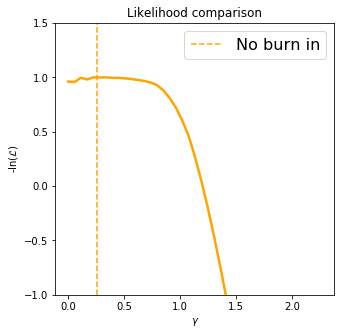

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))

axes.set_xlabel(r"$\gamma$")

bin_n=40
x = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n)[1] 
y = binned_statistic(samples1[:, 1], like1, 'max', bins=bin_n+1)[0]
y = y - np.max(y[~np.isnan(y)]) + 1
axes.plot(x, y, ls="-", color="orange", lw=2.5)
axes.axvline(samples1[:, 1][np.argmax(like1)], color="orange", ls="--", label="No burn in")


axes.set_ylim(-1, 1.5)
axes.legend(fontsize=16)

axes.set_ylabel(r"-ln($\mathcal{L}$)")

plt.title("Likelihood comparison")

In [9]:
def IMF_sampling(alpha, size, Mmin=14, Mmax=55):
    """
    Sampling from power-law distribution
    """
    y = np.random.uniform(0, 1, size=size)
    return ((Mmax**(alpha+1) - Mmin**(alpha+1))*y + Mmin**(alpha+1))**(1./(alpha+1))

In [46]:
from astropy.constants import L_sun, R_jup, M_jup, M_sun
N = 1000
_N = int(8.5*N)

# Mass
mass = IMF_sampling(-0.6, _N, Mmin=6, Mmax=75) # [Mjup]
mass = mass*M_jup.value/M_sun.value

In [58]:
relM = 0.1

# add Gaussian noise
mass_wn = mass + np.random.normal(loc=0, scale=(relM*mass), size=_N)

# select only those objects with masses between 14 and 55 Mjup and T > Tmin
pos  = np.where((mass_wn > 0.015) & (mass_wn < 0.051))  # 16 - 53 Mjup!


mass_wn, sigma_Mobs = mass_wn[pos][:N], relM*mass[pos][:N]


In [62]:
print(np.max(mass_wn*M_sun.value/M_jup.value))
print(np.min(mass_wn*M_sun.value/M_jup.value))

53.3480449067708
15.714476194777905


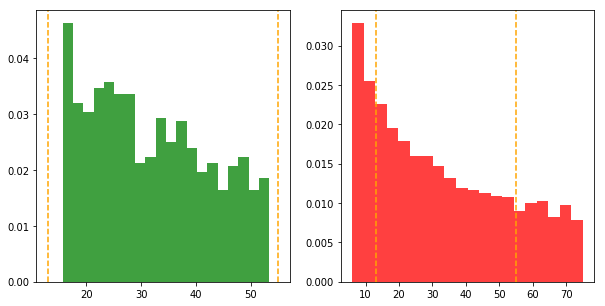

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.axvline(13, color="orange", ls="--", label="M_min")
ax1.axvline(55, color="orange", ls="--", label="M_max")

ax2.axvline(13, color="orange", ls="--", label="M_min")
ax2.axvline(55, color="orange", ls="--", label="M_max")

plt.axes(ax1)
n, bins, patches = plt.hist(mass_wn*M_sun.value/M_jup.value, 20, density=True, facecolor='g', alpha=0.75)


plt.axes(ax2)
n, bins, patches = plt.hist(mass*M_sun.value/M_jup.value, 20, density=True, facecolor='r', alpha=0.75)

In [71]:
relA = 0.1
ages = np.random.uniform(1., 10., _N) # [yr] / [1-10 Gyr]
ages_wn = ages + np.random.normal(loc=0, scale=(relA*ages), size=_N)
pos_a  = ((ages_wn > 1.002) & (ages_wn < 9.998))

ages_wn, Aobs_sigma = ages_wn[pos][:N], relA*ages[pos][:N]

C:\Users\SvenP\Anaconda3\lib\site-packages\matplotlib\pyplot.py:880: MatplotlibDeprecationWarning: 
Using pyplot.axes(ax) with ax an Axes argument is deprecated. Please use pyplot.sca(ax) instead.
  message="Using pyplot.axes(ax) with ax an Axes "


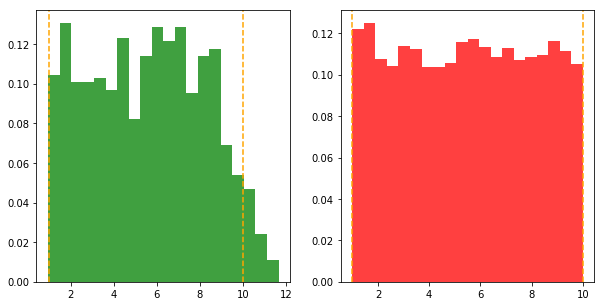

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.axvline( 1.002, color="orange", ls="--", label="M_min")
ax1.axvline(9.998, color="orange", ls="--", label="M_max")

ax2.axvline( 1.002, color="orange", ls="--", label="M_min")
ax2.axvline(9.998, color="orange", ls="--", label="M_max")

plt.axes(ax1)
n, bins, patches = plt.hist(ages_wn, 20, density=True, facecolor='g', alpha=0.75)


plt.axes(ax2)
n, bins, patches = plt.hist(ages, 20, density=True, facecolor='r', alpha=0.75)